In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
data = np.load('C:/Users/AKASH/Desktop/mnist_compressed.npz')
train_images, train_labels = data['train_images'], data['train_labels']
test_images, test_labels = data['test_images'], data['test_labels']

# Normalize the image data (pixel values between 0 and 1)
train_images = train_images / 255.0
test_images = test_images / 255.0

In [11]:
print("Shape of train_images:", train_images.shape)
print("Shape of test_images:", test_images.shape)


num_train_samples, height, width = train_images.shape[0], train_images.shape[1], train_images.shape[2]

# Reshape the data to add a channel dimension
train_images = train_images.reshape(num_train_samples, height, width, 1)
test_images = test_images.reshape(test_images.shape[0], height, width, 1)

train_labels = to_categorical(train_labels, 100)
test_labels = to_categorical(test_labels, 100)

# Adjust the CNN's input shape based on actual image dimensions
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(100, activation='softmax')
])




Shape of train_images: (60000, 28, 56)
Shape of test_images: (10000, 28, 56)


In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=3, batch_size=32, validation_split=0.2)

Epoch 1/3
1500/1500 [==============================] - 152s 97ms/step - loss: 0.7180 - accuracy: 0.8049 - val_loss: 0.2106 - val_accuracy: 0.9343
Epoch 2/3
1500/1500 [==============================] - 104s 69ms/step - loss: 0.1522 - accuracy: 0.9540 - val_loss: 0.1446 - val_accuracy: 0.9546
Epoch 3/3
1500/1500 [==============================] - 72s 48ms/step - loss: 0.0916 - accuracy: 0.9710 - val_loss: 0.1274 - val_accuracy: 0.9623


1/1 [==============================] - 0s 255ms/step


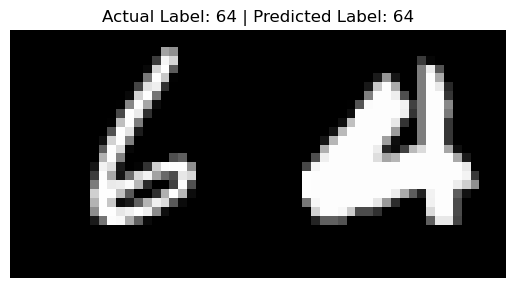

Predicted Probabilities: [[2.54560609e-11 4.58768093e-12 7.06048900e-11 2.38586837e-14
  9.35364142e-08 1.25012067e-12 3.74908382e-10 4.16372937e-15
  8.07881817e-11 6.43005484e-12 8.01566799e-12 8.19814702e-13
  1.00335946e-11 3.19870769e-15 9.80805881e-10 5.49273804e-15
  6.63166137e-12 2.47959507e-18 1.97105310e-12 1.48597836e-14
  1.20094637e-11 1.02607191e-12 8.20444407e-11 5.58948233e-15
  6.37809050e-09 1.24903013e-14 1.88734662e-12 2.25312104e-17
  3.43245952e-11 5.30329741e-13 4.78165684e-12 1.77803888e-14
  1.83826912e-11 5.32012765e-16 1.08701798e-10 1.25538732e-15
  1.89667794e-13 1.39237145e-17 2.42865651e-13 4.79229991e-13
  3.07122990e-12 3.73277188e-14 7.19934182e-12 4.16821288e-14
  1.33312188e-08 2.26289976e-15 4.71981802e-14 2.15545334e-17
  1.11241268e-12 1.18234585e-14 2.54154919e-08 1.44251616e-11
  2.03457873e-09 3.18195882e-13 1.06183234e-06 5.62407586e-12
  8.68479733e-11 1.14797723e-14 5.88769478e-10 9.65671154e-11
  1.29515844e-04 8.47729461e-06 6.44333704e-0

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Select one image from the training set
single_image = train_images[0]
single_label = np.argmax(train_labels[0])  # Get the actual label

# Add batch dimension to the image
single_image_batch = np.expand_dims(single_image, axis=0)  # Shape becomes (1, height, width, 1)

# Make a prediction
predicted_probabilities = model.predict(single_image_batch)
predicted_label = np.argmax(predicted_probabilities)  # Get the predicted class

# Display the image and the prediction
plt.imshow(single_image.squeeze(), cmap='gray')  # Remove channel dimension for display
plt.title(f"Actual Label: {single_label} | Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()

# Print detailed probabilities (optional)
print(f"Predicted Probabilities: {predicted_probabilities}")
